In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
pip install yfinance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
# For reading stock data
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

In [ ]:
yf.pdr_override()

# For time stamps
from datetime import datetime


# The stock we'll use for this analysis
tech_list = ['WIPRO.NS']

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

In [ ]:
lt=[]
df = pdr.get_data_yahoo('WIPRO.NS', start, end)

print(df.head(10))

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-11-08  652.950012  661.000000  647.500000  658.349976  650.251526   
2021-11-09  663.099976  666.250000  656.700012  658.450012  650.350342   
2021-11-10  655.900024  659.000000  651.549988  652.599976  644.572266   
2021-11-11  649.750000  649.750000  636.799988  641.799988  633.905090   
2021-11-12  648.000000  662.500000  645.799988  660.049988  651.930664   
2021-11-15  661.549988  666.000000  657.150024  658.900024  650.794800   
2021-11-16  658.400024  668.750000  654.650024  661.450012  653.313477   
2021-11-17  661.450012  668.000000  658.000000  661.799988  653.659180   
2021-11-18  663.400024  665.950012  645.250000  651.450012  643.436462   
2021-11-22  658.000000  660.450012  638.000000  644.049988  636.127441   

             Volume  
Date                

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-31,383.200012,384.100006,379.149994,381.799988,381.799988,3076768
2023-11-01,383.850006,385.549988,380.149994,380.950012,380.950012,2120976
2023-11-02,383.799988,385.149994,382.100006,383.649994,383.649994,2371365
2023-11-03,386.000000,386.700012,382.649994,383.549988,383.549988,2645764
2023-11-06,386.000000,386.450012,383.000000,384.649994,384.649994,2469968


In [ ]:
df.shape

(496, 6)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02
mean,456.548589,460.155747,451.355342,455.436895,453.529458,6.184116e+06
std,94.920431,96.211423,93.137138,94.497485,91.877362,4.352984e+06
min,358.000000,360.750000,352.000000,356.200012,356.200012,0.000000e+00
25%,393.899994,396.900009,390.575005,393.899994,393.231430,3.757700e+06
50%,409.925003,413.375000,406.550003,409.575012,409.291885,5.106418e+06
75%,484.750000,489.737503,477.262497,483.637497,482.449196,7.311851e+06
max,722.750000,726.799988,716.000000,721.500000,712.624756,5.230001e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2021-11-08 to 2023-11-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       496 non-null    float64
 1   High       496 non-null    float64
 2   Low        496 non-null    float64
 3   Close      496 non-null    float64
 4   Adj Close  496 non-null    float64
 5   Volume     496 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.1 KB


## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.


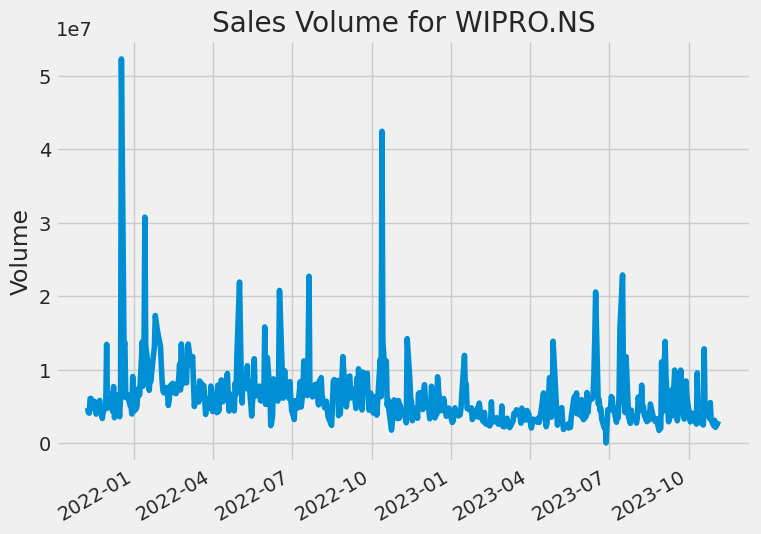

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    df['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

**MOVING AVERAGE**
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.
# New section

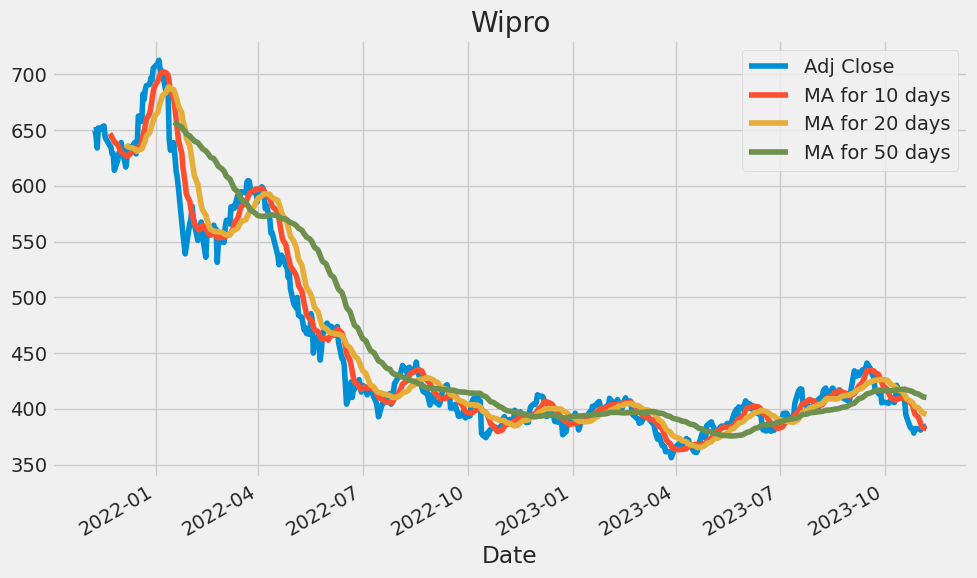

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in tech_list:
        column_name = f"MA for {ma} days"
        df[column_name] = df['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(6)
fig.set_figwidth(10)

df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes)
axes.set_title('Wipro')

fig.tight_layout()

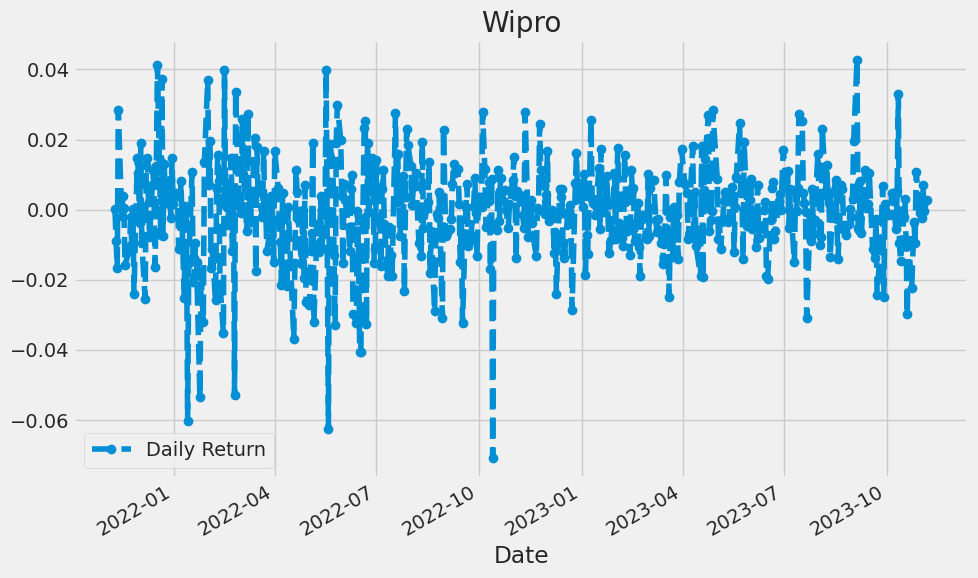

In [ ]:
df['Daily Return'] = df['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(6)
fig.set_figwidth(10)

df['Daily Return'].plot(ax=axes, legend=True, linestyle='--', marker='o')
axes.set_title('Wipro')

fig.tight_layout()

Predicting the closing price stock price of HDFC inc using LSTM:

---



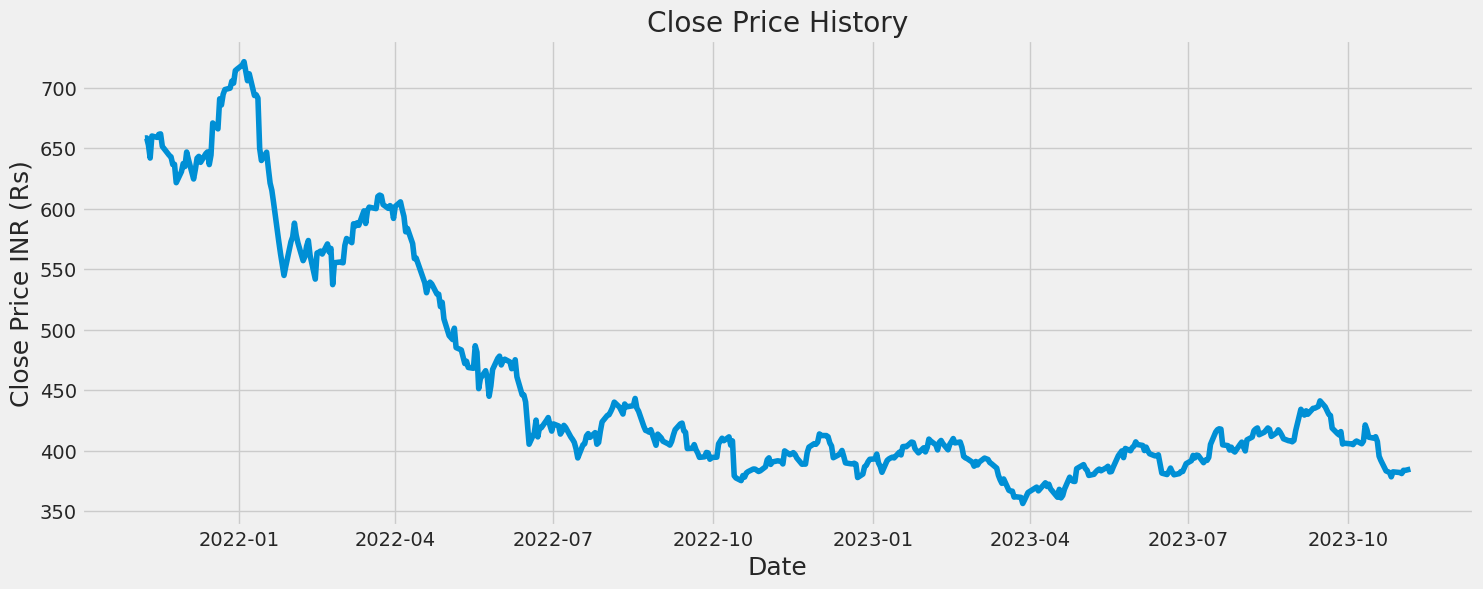

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (Rs)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .90 ))

training_data_len

447

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.82712832],
       [0.82740216],
       [0.81138783],
       [0.78182312],
       [0.83178206],
       [0.82863406],
       [0.83561459],
       [0.83657264],
       [0.80823983],
       [0.78798244],
       [0.78456059],
       [0.76731453],
       [0.76786206],
       [0.72611555],
       [0.75116335],
       [0.76936764],
       [0.76266079],
       [0.7955105 ],
       [0.7789488 ],
       [0.73446481],
       [0.75609094],
       [0.78154944],
       [0.78565565],
       [0.77210511],
       [0.79167813],
       [0.79578435],
       [0.76704085],
       [0.78866681],
       [0.86120993],
       [0.84793323],
       [0.91595945],
       [0.90186155],
       [0.92622498],
       [0.93690121],
       [0.94004921],
       [0.95606354],
       [0.95127296],
       [0.97974261],
       [0.98316445],
       [0.9923351 ],
       [1.        ],
       [0.97810019],
       [0.95688475],
       [0.97262524],
       [0.92335067],
       [0.92513009],
       [0.91746503],
       [0.803

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.82712832, 0.82740216, 0.81138783, 0.78182312, 0.83178206,
       0.82863406, 0.83561459, 0.83657264, 0.80823983, 0.78798244,
       0.78456059, 0.76731453, 0.76786206, 0.72611555, 0.75116335,
       0.76936764, 0.76266079, 0.7955105 , 0.7789488 , 0.73446481,
       0.75609094, 0.78154944, 0.78565565, 0.77210511, 0.79167813,
       0.79578435, 0.76704085, 0.78866681, 0.86120993, 0.84793323,
       0.91595945, 0.90186155, 0.92622498, 0.93690121, 0.94004921,
       0.95606354, 0.95127296, 0.97974261, 0.98316445, 0.9923351 ,
       1.        , 0.97810019, 0.95688475, 0.97262524, 0.92335067,
       0.92513009, 0.91746503, 0.80358609, 0.77634817, 0.79509998,
       0.75855457, 0.72529434, 0.70900632, 0.68122087, 0.59280042,
       0.56528882, 0.51615109, 0.53640848, 0.59238974, 0.60347665])]
[0.6345469355020613]

[array([0.82712832, 0.82740216, 0.81138783, 0.78182312, 0.83178206,
       0.82863406, 0.83561459, 0.83657264, 0.80823983, 0.78798244,
       0.78456059, 0.76731453, 0.767

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

387/387 [==============================] - 21s 45ms/step - loss: 0.0032


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 29ms/step


14.088723605728319

<ipython-input-21-ffce5fdcc1b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


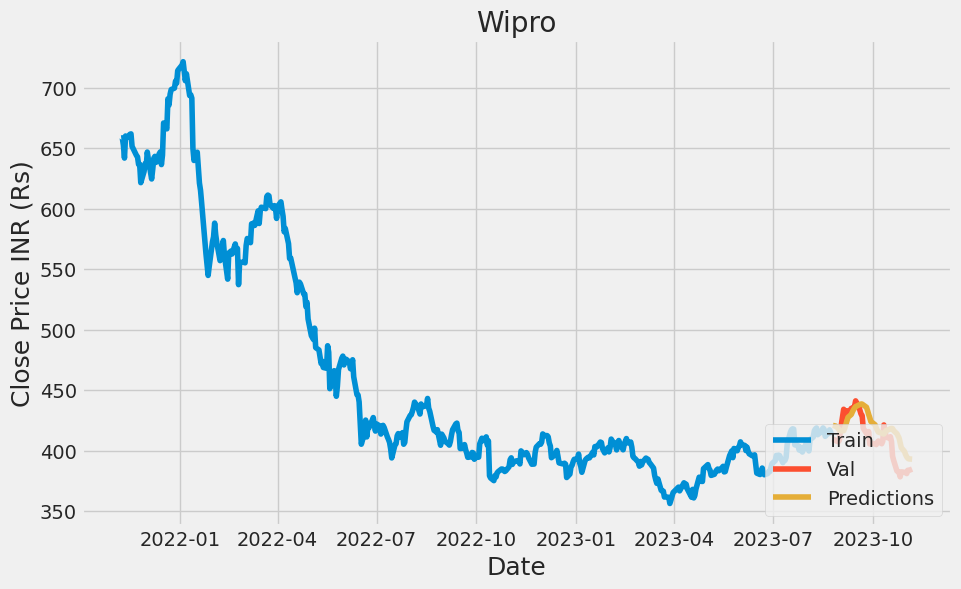

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(10,6))
plt.title('Wipro')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (Rs)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## **Using** **CNN**

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2021-11-08,652.950012,661.000000,647.500000,658.349976,650.251526,4752230,NaN,NaN,NaN,NaN
2021-11-09,663.099976,666.250000,656.700012,658.450012,650.350342,4142065,NaN,NaN,NaN,0.000152
2021-11-10,655.900024,659.000000,651.549988,652.599976,644.572266,4045695,NaN,NaN,NaN,-0.008885
2021-11-11,649.750000,649.750000,636.799988,641.799988,633.905090,6033898,NaN,NaN,NaN,-0.016549
2021-11-12,648.000000,662.500000,645.799988,660.049988,651.930664,6063253,NaN,NaN,NaN,0.028436
...,...,...,...,...,...,...,...,...,...,...
2023-10-31,383.200012,384.100006,379.149994,381.799988,381.799988,3076768,389.539999,399.662500,412.625002,-0.000524
2023-11-01,383.850006,385.549988,380.149994,380.950012,380.950012,2120976,386.495001,398.437500,412.010002,-0.002226
2023-11-02,383.799988,385.149994,382.100006,383.649994,383.649994,2371365,384.114999,397.375000,411.391002,0.007087


In [ ]:
pip install tensorflow keras

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error

In [ ]:
input_shape = x_train.shape[1]


In [ ]:
# Create and compile the model
model = Sequential()
model.add(Dense(64, input_dim=input_shape, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/50
7/7 [==============================] - 1s 30ms/step - loss: 0.0106 - val_loss: 168383.9375
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0069 - val_loss: 168364.5781
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 168358.7656
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 168359.3906
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.0026 - val_loss: 168353.4688
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 168363.3750
Epoch 7/50
7/7 [==============================] - 0s 6ms/step - loss: 0.0017 - val_loss: 168353.4531
Epoch 8/50
7/7 [==============================] - 0s 6ms/step - loss: 9.9024e-04 - val_loss: 168362.7031
Epoch 9/50
7/7 [==============================] - 0s 6ms/step - loss: 9.5246e-04 - val_loss: 168355.6719
Epoch 10/50
7/7 [==============================] - 0s 6ms/step - loss: 8.9557e-04 

In [ ]:
# Make predictions on the validation set
y_val_pred = model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
predictions = scaler.inverse_transform(y_val_pred)

In [ ]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

9.599892360914739

<ipython-input-31-ffce5fdcc1b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


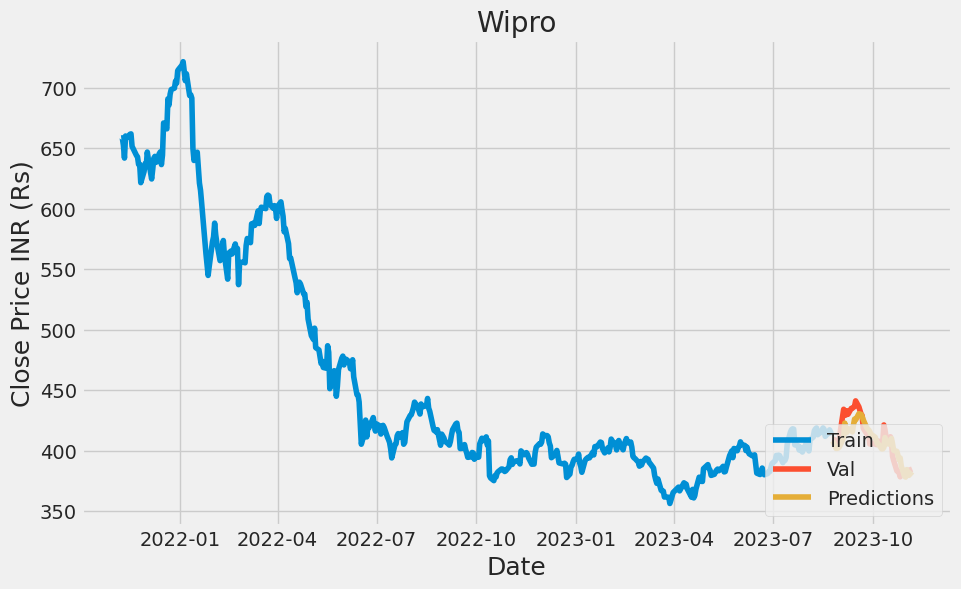

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(10,6))
plt.title('Wipro')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (Rs)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Using Hybrid CNN + LSTM

In [ ]:
input_shape = x_train.shape[1]


In [ ]:
# Create and compile the hybrid CNN + LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_shape, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
7/7 [==============================] - 3s 105ms/step - loss: 0.0731 - val_loss: 168418.7344
Epoch 2/50
7/7 [==============================] - 0s 37ms/step - loss: 0.0198 - val_loss: 168337.8438
Epoch 3/50
7/7 [==============================] - 0s 24ms/step - loss: 0.0074 - val_loss: 168307.2656
Epoch 4/50
7/7 [==============================] - 0s 24ms/step - loss: 0.0045 - val_loss: 168345.7969
Epoch 5/50
7/7 [==============================] - 0s 25ms/step - loss: 0.0038 - val_loss: 168350.9531
Epoch 6/50
7/7 [==============================] - 0s 26ms/step - loss: 0.0029 - val_loss: 168342.4844
Epoch 7/50
7/7 [==============================] - 0s 25ms/step - loss: 0.0022 - val_loss: 168362.3438
Epoch 8/50
7/7 [==============================] - 0s 26ms/step - loss: 0.0027 - val_loss: 168361.7344
Epoch 9/50
7/7 [==============================] - 0s 24ms/step - loss: 0.0021 - val_loss: 168354.9531
Epoch 10/50
7/7 [==============================] - 0s 25ms/step - loss: 0.0020 - 

In [ ]:
# Make predictions on the validation set
y_val_pred = model.predict(x_test)

2/2 [==============================] - 0s 9ms/step


In [ ]:
predictions = scaler.inverse_transform(y_val_pred)

In [ ]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

12.136448251942388

<ipython-input-38-ffce5fdcc1b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


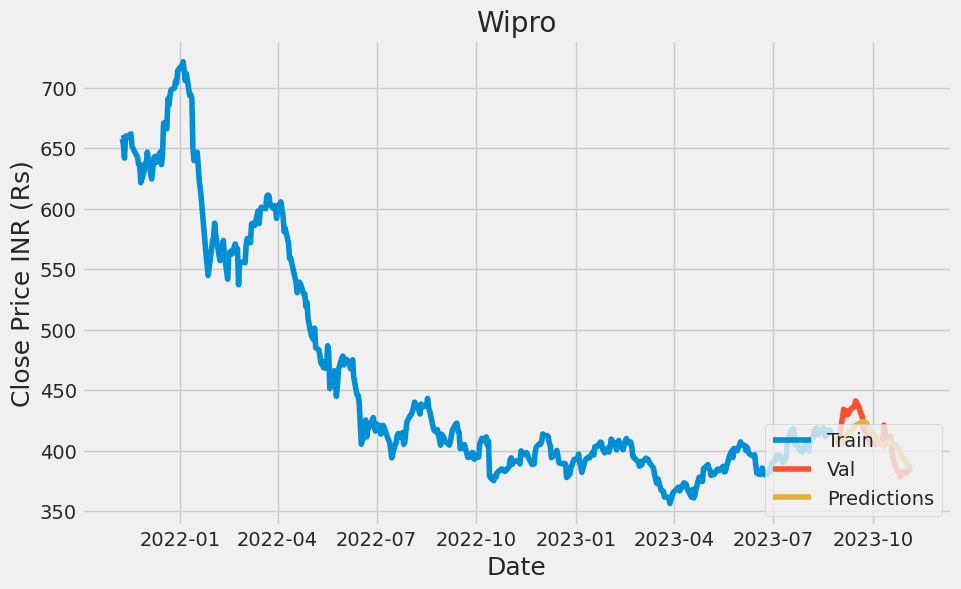

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(10,6))
plt.title('Wipro')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (Rs)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()